<a href="https://colab.research.google.com/github/SJinji/recommendation-system-with-last.fm-dataset/blob/main/Deezer_2_Data_Exploration_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
! unzip /content/deezer-tech-test-DS-internship.zip

In [103]:
artists = pd.read_csv('deezer-business-case/data/artists.dat',sep="\t")
tags = pd.read_csv('deezer-business-case/data/tags.dat',encoding="gbk",sep="\t")
user_artists = pd.read_csv('deezer-business-case/data/user_artists.dat',sep="\t")
user_friends = pd.read_csv('deezer-business-case/data/user_friends.dat',sep='\t')
tag_artists = pd.read_csv('deezer-business-case/data/user_taggedartists.dat',sep='\t')

### Tags

In [82]:
m_tag_artists= pd.merge(tag_artists, tags, on="tagID", how="left")

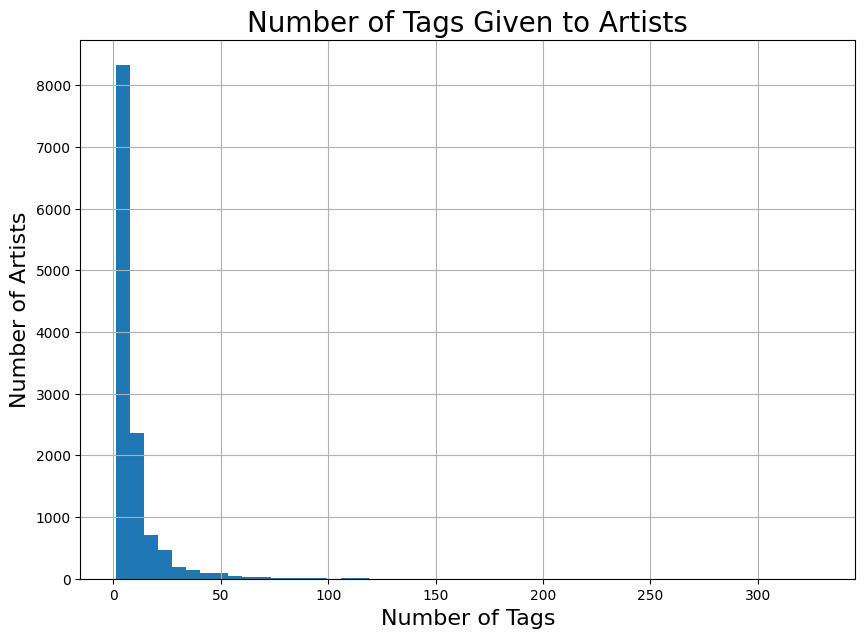

In [83]:
fig, ax = plt.subplots(figsize=(10, 7))
m_tag_artists.groupby("artistID")["tagID"].nunique().hist(bins=50, ax=ax)
plt.title("Number of Tags Given to Artists", fontsize=20)
plt.xlabel("Number of Tags", fontsize=16)
plt.ylabel("Number of Artists", fontsize=16)
plt.show()

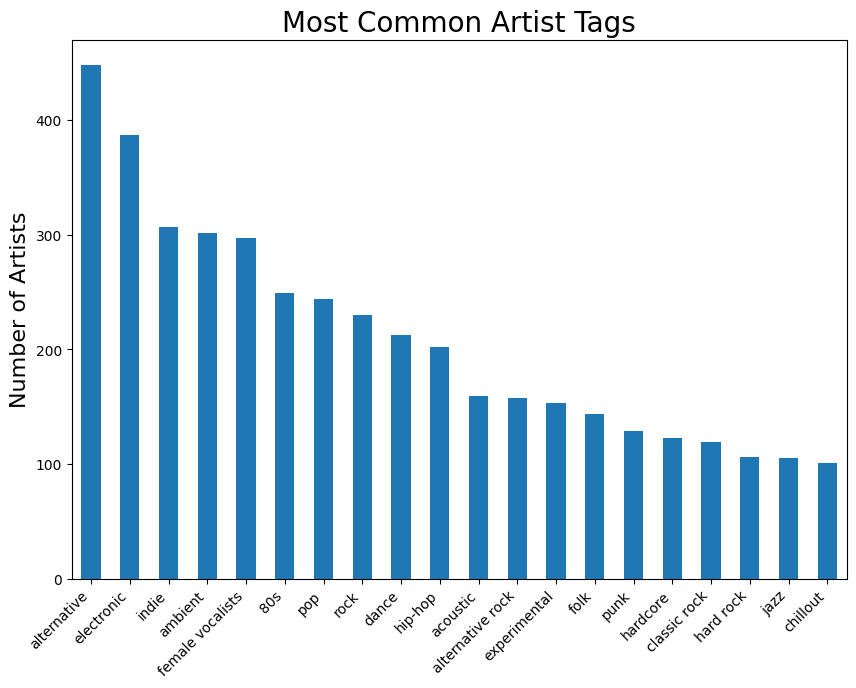

In [84]:
most_common_tag = (
    m_tag_artists
    .groupby("artistID")["tagValue"]
    .value_counts().rename("count").reset_index()
    .groupby("artistID")
    .first()["tagValue"]
)

fig, ax = plt.subplots(figsize=(10, 7))
most_common_tag.value_counts().head(20).plot.bar(ax=ax)
plt.title("Most Common Artist Tags", fontsize=20)
plt.ylabel("Number of Artists", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.show()

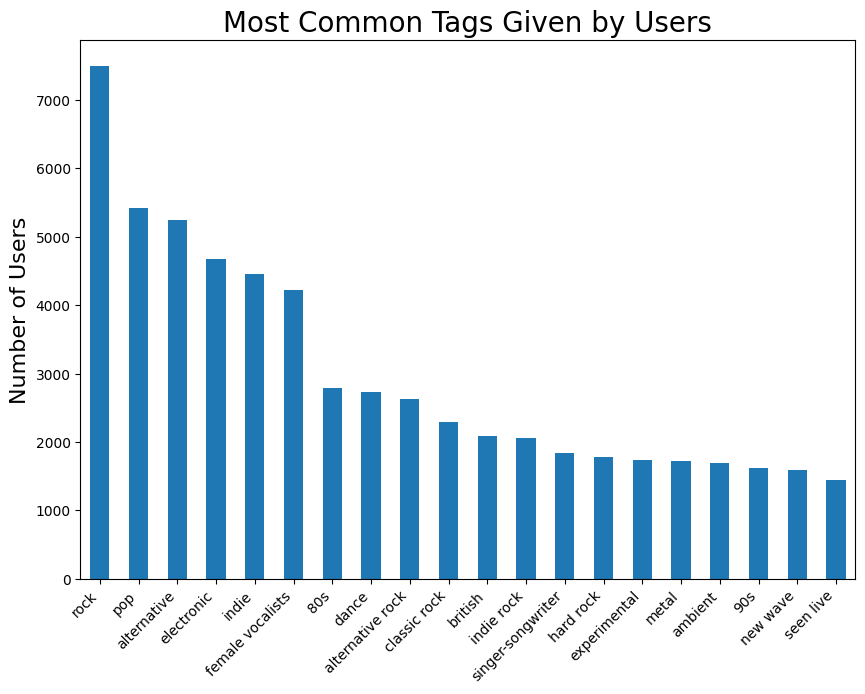

In [85]:
fig, ax = plt.subplots(figsize=(10, 7))
m_tag_artists[["artistID", "userID", "tagValue"]].drop_duplicates()["tagValue"].value_counts().head(20).plot.bar(ax=ax)
plt.title("Most Common Tags Given by Users", fontsize=20)
plt.ylabel("Number of Users", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.show()

### Artist

In [88]:
m_user_artists = pd.merge(user_artists, artists, left_on="artistID", right_on="id", how="left").drop(columns=["id", "url", "pictureURL"])

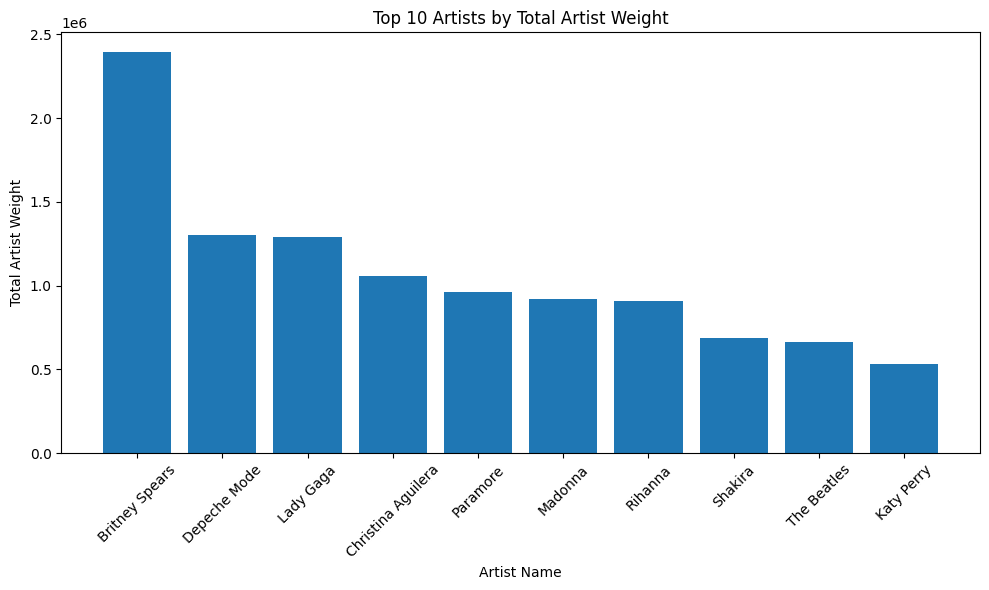

In [90]:
# 1. Bar plot to show the top 10 artists based on artistWeight(listening count)
top_artists = m_user_artists.groupby('name')['weight'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(top_artists.index, top_artists.values)
plt.xticks(rotation=45)
plt.xlabel('Artist Name')
plt.ylabel('Total Artist Weight')
plt.title('Top 10 Artists by Total Artist Weight')
plt.tight_layout()
plt.show()

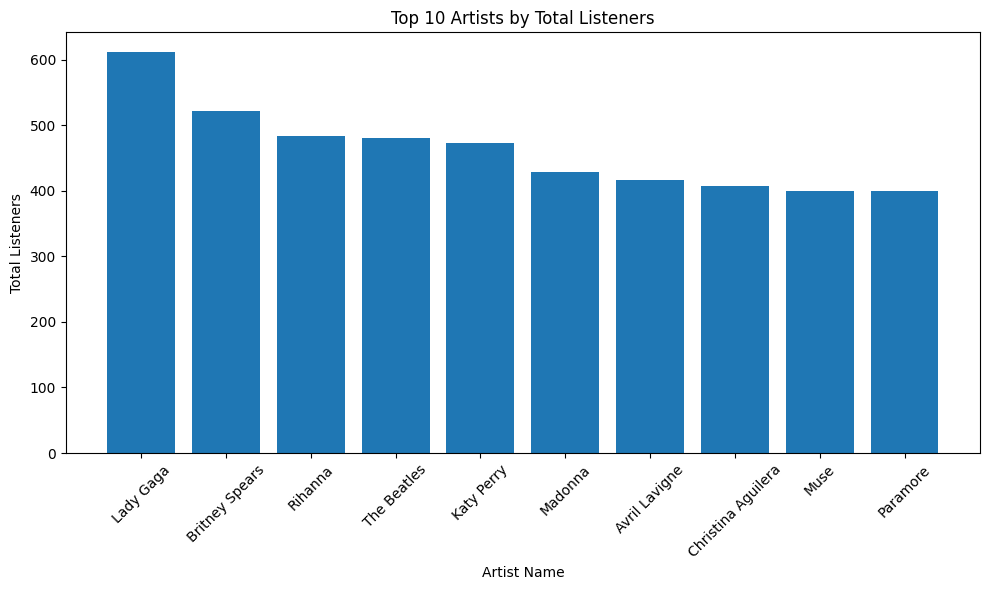

In [91]:
top_artists_by_listener = m_user_artists.groupby('name')['userID'].count().nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(top_artists_by_listener.index, top_artists_by_listener.values)
plt.xticks(rotation=45)
plt.xlabel('Artist Name')
plt.ylabel('Total Listeners')
plt.title('Top 10 Artists by Total Listeners')
plt.tight_layout()
plt.show()

### User

In [95]:
top_users = m_user_artists.groupby('userID')['weight'].sum()
top_users_df = top_users.sort_values(ascending=False).head(10).reset_index()
top_users_df.columns = ['User ID', 'Total Listening Weight']
print('The top users in terms of listening counts:')
print('-'*40)
print(top_users_df)

The top users in terms of listening counts:
----------------------------------------
   User ID  Total Listening Weight
0      757                  480039
1     2000                  468409
2     1418                  416349
3     1642                  388251
4     1094                  379125
5     1942                  348527
6     2071                  338400
7     2031                  329980
8      514                  329782
9      387                  322661


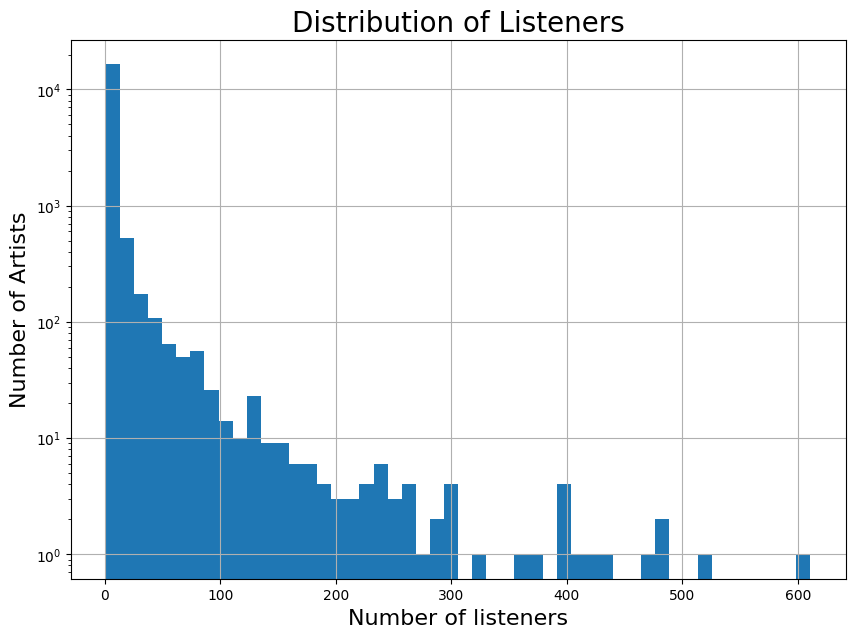

In [98]:
fig, ax = plt.subplots(figsize=(10, 7))
m_user_artists.groupby("artistID")["userID"].nunique().hist(bins=50, ax=ax)
plt.title("Distribution of Listeners", fontsize=20)
plt.xlabel("Number of listeners", fontsize=16)
plt.ylabel("Number of Artists", fontsize=16)
plt.yscale("log")
plt.show()

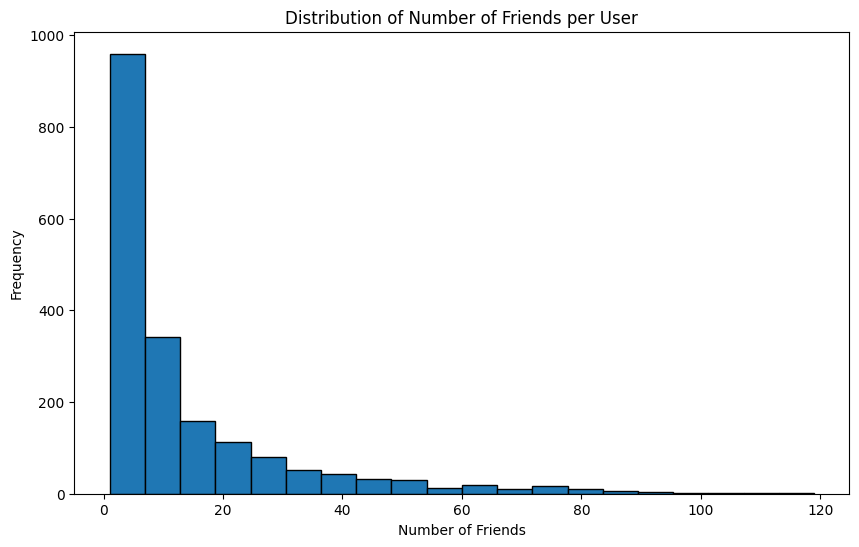

In [96]:
# 6. Bar plot to show the distribution of friend counts for users
user_friend_counts = user_friends.groupby('userID')['friendID'].nunique()
plt.figure(figsize=(10, 6))
plt.hist(user_friend_counts, bins=20, edgecolor='k')
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Friends per User')
plt.show()

In [100]:
# Calculate each user's friend count
friend_counts = user_friends.friendID.groupby(user_friends.userID).nunique()

# Calculate each user's total number of listened songs
total_listened_songs = user_artists.weight.groupby(user_artists.userID).sum()

# Create a new DataFrame storing friend count and total listened songs for each user
df6 = pd.DataFrame({'Friend Count': friend_counts, 'Total Listened Songs': total_listened_songs, 'User ID': friend_counts.index})

# Calculate the average number of listened songs for users with less than 5 friends
avg_listened_songs_ls_friends = df6[df6['Friend Count'] < 5]['Total Listened Songs'].mean()

# Calculate the average number of listened songs for users with 5 or more friends
avg_listened_songs_mr_friends = df6[df6['Friend Count'] >= 5]['Total Listened Songs'].mean()

# Display the average number of listened songs for each group
print('    Average number of listened songs of users (< 5 friends): {:.2f}'.format(avg_listened_songs_ls_friends))
print('    Average number of listened songs of users (>= 5 friends): {:.2f}'.format(avg_listened_songs_mr_friends))

# Compare the averages and provide the conclusion
if avg_listened_songs_ls_friends < avg_listened_songs_mr_friends:
    print('    Users with five or more friends listen to more songs on average.')
elif avg_listened_songs_ls_friends > avg_listened_songs_mr_friends:
    print('    Users with five or more friends listen to fewer songs on average.')
else:
    print('    Friend count does not significantly influence the number of listened songs.')


    Average number of listened songs of users (< 5 friends): 24513.86
    Average number of listened songs of users (>= 5 friends): 44676.33
    Users with five or more friends listen to more songs on average.


In [102]:
# Get the current 10 top-tagged artists
toptag_artist = tag_artists['tagID'].groupby(tag_artists['artistID']).count().nlargest(10)

# Combine year and month columns
tag_artists['year-month'] = tag_artists['year'].astype(str) + '-' + tag_artists['month'].astype(str)

# Group by 'year-month' and 'artistID' to calculate artists' tag numbers per month every year
tag_counts_per_month = tag_artists.groupby(['year-month', 'artistID'])['tagID'].count().reset_index()
tag_counts_per_month.rename(columns={'tagID': 'tagCounts'}, inplace=True)

# Filter out records from last century (if any)
tag_counts_per_month = tag_counts_per_month[tag_counts_per_month['year-month'].str.startswith('20')]

# Sort by 'tagCounts' in descending order for each month
tag_counts_per_month = tag_counts_per_month.sort_values(by='tagCounts', ascending=False)

# Create a DataFrame to store the first time each artist entered the top 10 for each month
first_time_in_top_10 = pd.DataFrame(columns=['artistID', 'year-month'])

# Iterate through each artist in the current top 10
for artist, tag_count in toptag_artist.items():
    artist_name = artists.loc[artists['id'] == artist, 'name'].item()
    print(f'    {artist_name} ({artist}):  num tags = {tag_count}')

    # Check if the artist is in the history top 10 for each month, and record the first time
    first_time = tag_counts_per_month[tag_counts_per_month['artistID'] == artist]['year-month'].min()
    if pd.notna(first_time):
        print(f"      First time in top 10: {first_time}")
        first_time_in_top_10 = first_time_in_top_10.append({'artistID': artist, 'year-month': first_time}, ignore_index=True)
    print(f"      Total months in top 10: {tag_count}\n")

# Print the artists who have entered the top 10 for each month and the first time they did so
if not first_time_in_top_10.empty:
    print('Artists and their first time entering the top 10 for each month:')
    first_time_in_top_10 = first_time_in_top_10.merge(artists[['id', 'name']], left_on='artistID', right_on='id', how='left')
    first_time_in_top_10 = first_time_in_top_10[['name', 'artistID', 'year-month']].rename(columns={'name': 'artist_name'})
    first_time_in_top_10.sort_values(by=['artist_name', 'year-month'], inplace=True)
    print(first_time_in_top_10)



    Britney Spears (289):  num tags = 931
      First time in top 10: 2006-1
      Total months in top 10: 931

    Lady Gaga (89):  num tags = 767
      First time in top 10: 2008-10
      Total months in top 10: 767

    Christina Aguilera (292):  num tags = 762
      First time in top 10: 2005-11
      Total months in top 10: 762

    Madonna (67):  num tags = 730
      First time in top 10: 2005-10
      Total months in top 10: 730

    Depeche Mode (72):  num tags = 701
      First time in top 10: 2005-11
      Total months in top 10: 701

    The Beatles (227):  num tags = 598
      First time in top 10: 2005-10
      Total months in top 10: 598

    Muse (190):  num tags = 595
      First time in top 10: 2005-10
      Total months in top 10: 595

    Radiohead (154):  num tags = 563
      First time in top 10: 2005-10
      Total months in top 10: 563

    Rihanna (288):  num tags = 528
      First time in top 10: 2006-10
      Total months in top 10: 528

    Michael Jackson (1